 # <center> HW2 for CSCI5461

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Clinic Data

In [2]:
work_dic = '/Users/liyang/Desktop/2020-work_report/005_BICB/2021-spring-course/csci5461/hws/hw2'


In [3]:
clinic_data = pd.read_csv(f'{work_dic}/ov_tcga_clinical_data.tsv', sep='\t', index_col=['Sample ID'])

In [4]:
clinic_data['Overall Survival (Months)']

Sample ID
TCGA-04-1331-01    43.89
TCGA-04-1332-01    40.97
TCGA-04-1335-01     1.81
TCGA-04-1336-01    49.11
TCGA-04-1337-01     2.00
                   ...  
TCGA-72-4241-01      NaN
TCGA-OY-A56P-01    39.65
TCGA-OY-A56Q-01    18.92
TCGA-VG-A8LO-01     0.79
TCGA-WR-A838-01     9.99
Name: Overall Survival (Months), Length: 617, dtype: float64

In [5]:
clinic_data["Overall Survival Status"]

Sample ID
TCGA-04-1331-01    1:DECEASED
TCGA-04-1332-01    1:DECEASED
TCGA-04-1335-01    1:DECEASED
TCGA-04-1336-01      0:LIVING
TCGA-04-1337-01    1:DECEASED
                      ...    
TCGA-72-4241-01           NaN
TCGA-OY-A56P-01      0:LIVING
TCGA-OY-A56Q-01      0:LIVING
TCGA-VG-A8LO-01    1:DECEASED
TCGA-WR-A838-01    1:DECEASED
Name: Overall Survival Status, Length: 617, dtype: object

In [6]:
survival_info = clinic_data.loc[:,['Overall Survival Status','Overall Survival (Months)']]

In [7]:
survival_info.info()
survival_info.head()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, TCGA-04-1331-01 to TCGA-WR-A838-01
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival Status    602 non-null    object 
 1   Overall Survival (Months)  599 non-null    float64
dtypes: float64(1), object(1)
memory usage: 34.5+ KB


,Overall Survival Status,Overall Survival (Months)
Sample ID,,
TCGA-04-1331-01,1:DECEASED,43.89
TCGA-04-1332-01,1:DECEASED,40.97
TCGA-04-1335-01,1:DECEASED,1.81
TCGA-04-1336-01,0:LIVING,49.11
TCGA-04-1337-01,1:DECEASED,2.00


In [8]:
survival_info['Group'] = np.nan

In [9]:
# Create group
group1_info = (survival_info['Overall Survival Status'] == '1:DECEASED') & (survival_info['Overall Survival (Months)'] <36)
survival_info.Group[group1_info] = 1

/Users/liyang/miniconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
group2_info = (survival_info['Overall Survival (Months)'] >36)
survival_info.Group[group2_info] = 2

/Users/liyang/miniconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
survival_info.info()

survival_info.head()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, TCGA-04-1331-01 to TCGA-WR-A838-01
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival Status    602 non-null    object 
 1   Overall Survival (Months)  599 non-null    float64
 2   Group                      459 non-null    float64
dtypes: float64(2), object(1)
memory usage: 39.3+ KB


,Overall Survival Status,Overall Survival (Months),Group
Sample ID,,,
TCGA-04-1331-01,1:DECEASED,43.89,2.0
TCGA-04-1332-01,1:DECEASED,40.97,2.0
TCGA-04-1335-01,1:DECEASED,1.81,1.0
TCGA-04-1336-01,0:LIVING,49.11,2.0
TCGA-04-1337-01,1:DECEASED,2.00,1.0


## Read RNA Data

In [12]:
rna_data = pd.read_csv(f'{work_dic}/HiSeqV2.txt',sep='\t', index_col=0)

In [13]:
rna_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20530 entries, ARHGEF10L to SELS
Columns: 308 entries, TCGA-61-1910-01 to TCGA-57-1585-01
dtypes: float64(308)
memory usage: 48.4+ MB


In [14]:
rna_data.head()

,TCGA-61-1910-01,TCGA-61-1728-01,TCGA-09-1666-01,TCGA-24-1469-01,TCGA-04-1348-01,TCGA-61-1917-01,TCGA-61-2009-01,TCGA-31-1950-01,TCGA-31-1951-01,TCGA-61-1995-01,...,TCGA-24-1560-01,TCGA-29-1783-01,TCGA-59-2348-01,TCGA-24-1424-01,TCGA-13-1507-01,TCGA-25-2404-01,TCGA-61-2095-01,TCGA-29-1702-01,TCGA-24-1417-01,TCGA-57-1585-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,9.6011,9.3203,8.1951,8.5826,8.7195,8.0901,8.6452,9.8853,10.1132,8.7514,...,6.1288,9.6335,9.9237,8.9389,8.6923,9.2133,10.2494,8.1640,8.6072,10.0930
HIF3A,3.2786,7.3655,5.6778,9.6524,9.9184,11.2161,9.6066,8.7037,8.8622,5.7859,...,8.0357,10.9582,2.7875,10.0217,5.5355,7.1770,10.0390,10.9421,9.0313,8.9991
RNF17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4621,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8216,0.0000,0.0000,0.0000
RNF10,12.4351,11.8492,11.0238,11.4436,12.1362,11.1611,11.9031,12.1210,12.1182,12.1572,...,12.8924,11.6807,12.5429,12.2612,10.6557,12.0531,11.8931,11.1066,11.7897,11.6380
RNF11,10.1028,10.7862,11.3112,10.4607,10.2388,10.8223,11.1603,10.6347,10.7654,11.0157,...,11.8616,11.5198,11.1295,10.6540,11.3689,10.7873,10.7397,11.2760,11.0385,10.8238


In [15]:
rna_data_T = rna_data.T

SeqData = rna_data_T.join(survival_info.Group)

SeqData = SeqData.loc[:,[SeqData.columns[-1],*SeqData.columns[:-1]]]

SeqData_groups = SeqData[(SeqData.Group == 1 ) | (SeqData.Group == 2)]


SeqData_groups.index.name = "Sample IDs"

In [16]:
SeqData_groups.reset_index().to_csv('SeqData.txt', index=False, sep='\t') # save file

In [17]:
(SeqData_groups == 0).all(axis=0).sum()

368

In [18]:
genes_no_expression = (SeqData_groups == 0).all(axis=0)[~(SeqData_groups == 0).all(axis=0)].index
SeqData_groups_exp = SeqData_groups[genes_no_expression]

In [19]:
SeqData_groups_exp.head()

,Group,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
Sample IDs,,,,,,,,,,,,,,,,,,,,,
TCGA-61-1910-01,2.0,9.6011,3.2786,0.0,12.4351,10.1028,8.6764,12.8725,4.4134,0.0000,...,0.0000,0.0000,1.9640,3.8619,8.7001,11.3843,6.7336,12.5475,1.5530,10.4009
TCGA-09-1666-01,2.0,8.1951,5.6778,0.0,11.0238,11.3112,9.9497,13.6193,4.8914,0.0000,...,0.0000,0.0000,3.9392,2.5621,10.3324,11.6578,5.3968,12.6234,2.5621,9.3369
TCGA-04-1348-01,2.0,8.7195,9.9184,0.0,12.1362,10.2388,11.1340,12.5353,5.7103,1.5272,...,0.6209,0.6209,5.1354,3.1806,9.5047,10.9292,6.3034,12.5048,3.6816,10.0313
TCGA-61-1917-01,2.0,8.0901,11.2161,0.0,11.1611,10.8223,9.7950,13.6568,6.5339,0.0000,...,0.0000,0.0000,5.0384,2.6411,9.9990,12.2048,6.3377,12.5747,3.5205,9.4125
TCGA-61-2009-01,2.0,8.6452,9.6066,0.0,11.9031,11.1603,11.6905,11.8844,7.9650,0.0000,...,0.0000,0.0000,4.2704,0.5435,9.7750,11.3862,7.0575,12.2268,3.1337,10.2244


## Read Microarray Data

In [20]:
micro_data = pd.read_csv(f'{work_dic}/HT_HG-U133A.txt', sep='\t', index_col=0)

In [21]:
micro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12042 entries, RNF14 to SELP
Columns: 593 entries, TCGA-61-1910-01 to TCGA-13-0723-01
dtypes: float64(593)
memory usage: 54.6+ MB


In [22]:
micro_data.head()

,TCGA-61-1910-01,TCGA-61-1728-01,TCGA-13-1819-02,TCGA-31-1953-01,TCGA-13-1819-01,TCGA-13-0764-01,TCGA-31-1951-01,TCGA-24-1552-01,TCGA-13-1477-01,TCGA-30-1862-01,...,TCGA-13-0891-01,TCGA-24-2289-01,TCGA-13-1481-01,TCGA-25-2397-01,TCGA-24-1545-01,TCGA-61-1907-01,TCGA-01-0633-11,TCGA-04-1638-01,TCGA-36-2547-01,TCGA-13-0723-01
sample,,,,,,,,,,,,,,,,,,,,,
RNF14,6.941078,5.495212,7.360527,6.306363,7.566908,4.268062,6.134183,5.986532,5.760792,6.374809,...,5.816779,6.303769,6.562696,5.937574,6.401639,5.443979,5.903293,5.143002,6.333104,5.539232
UBE2Q1,9.025427,8.820866,8.978215,8.957118,9.083398,9.681899,9.158088,8.882655,9.396224,9.851244,...,9.024067,9.576895,9.299729,8.907340,8.794675,9.129143,9.316041,9.383539,8.679777,9.483554
RNF17,3.541457,3.695260,3.566616,3.659622,3.418126,3.852854,3.546678,3.677748,3.543781,3.531180,...,3.639406,3.409829,3.584287,3.534692,3.457474,3.516842,3.508452,3.671198,3.757653,3.557169
RNF10,6.825689,5.827807,6.284133,6.587385,6.009742,5.566286,6.321934,5.891136,5.864911,6.071201,...,6.526960,6.062001,5.859823,5.671649,6.123573,6.471297,5.848815,5.081132,6.245392,6.440326
RNF11,7.751515,7.137291,8.424838,7.583343,8.674001,7.636625,7.217718,8.126638,6.865171,8.937479,...,8.625196,7.788381,7.751558,8.470624,7.791921,8.976595,7.749953,8.299260,8.563890,7.405564


In [23]:
micro_data_T = micro_data.T

micro_data = micro_data_T.join(survival_info.Group)

micro_data = micro_data.loc[:,[micro_data.columns[-1],*micro_data.columns[:-1]]]


How many genes are in the RNAseq gene expression profiles?

- How many patient samples are in the RNAseq gene expression profiles? 308

- How many genes are in the microarray gene expression profiles? 12042

- How many patient samples are in the microarray gene expression profiles? 593

In [24]:
micro_data_groups = micro_data[(micro_data.Group == 1 ) | (micro_data.Group == 2)]

micro_data_groups.index.name = "Sample IDs"

micro_data_groups.reset_index().to_csv("ArrayData.txt", index=False, sep='\t')

In [25]:
micro_data_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, TCGA-61-1910-01 to TCGA-13-0723-01
Columns: 12043 entries, Group to SELP
dtypes: float64(12043)
memory usage: 40.9+ MB


In [26]:
genes_expression = (micro_data_groups == 0).all(axis=0)[~(micro_data_groups == 0).all(axis=0)].index
micro_data_groups_exp = micro_data_groups[genes_expression]

In [27]:
micro_data_groups_exp.head()

,Group,RNF14,UBE2Q1,RNF17,RNF10,RNF11,RNF13,REM1,TSKS,NDP,...,SELE,SLC7A10,SLC7A11,FOLR1,NPY5R,GNGT1,PTRF,SERPINH1,NFIX,SELP
Sample IDs,,,,,,,,,,,,,,,,,,,,,
TCGA-61-1910-01,2.0,6.941078,9.025427,3.541457,6.825689,7.751515,7.281667,4.560332,3.490956,3.882224,...,2.854520,3.306524,4.570365,11.150779,3.403954,3.512814,5.947151,6.274709,4.148178,3.880449
TCGA-13-1819-02,2.0,7.360527,8.978215,3.566616,6.284133,8.424838,8.049962,4.504023,3.145425,6.301663,...,2.956871,3.349953,5.665327,11.181583,3.079127,4.160581,5.731416,7.898799,4.363451,3.377120
TCGA-13-1819-01,2.0,7.566908,9.083398,3.418126,6.009742,8.674001,8.132495,4.659871,3.194257,6.633613,...,3.101158,3.225847,5.060358,11.173485,3.129602,4.649556,5.425046,8.295082,4.546045,3.589866
TCGA-13-0764-01,2.0,4.268062,9.681899,3.852854,5.566286,7.636625,7.385058,4.253423,3.245451,3.342498,...,2.930981,3.335117,4.192721,10.509552,3.123409,3.327574,4.555966,8.080319,3.775437,3.417678
TCGA-24-1552-01,2.0,5.986532,8.882655,3.677748,5.891136,8.126638,7.343167,4.643463,3.415264,3.892506,...,3.022331,3.447184,4.573542,6.298503,3.118976,3.165366,5.486274,6.866231,3.347275,3.367566


In [28]:
micro_data_groups_exp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, TCGA-61-1910-01 to TCGA-13-0723-01
Columns: 12043 entries, Group to SELP
dtypes: float64(12043)
memory usage: 40.9+ MB


## RNASeq test

In [29]:
# ttest
from scipy.stats import ttest_ind
import seaborn as sns

In [30]:
genes_id = SeqData_groups_exp.columns[1:]

In [31]:
group1 = SeqData_groups_exp[SeqData_groups_exp.Group == 1].iloc[:,1:]
group2 = SeqData_groups_exp[SeqData_groups_exp.Group == 2].iloc[:,1:]

In [32]:
group1.shape
group2.shape

(96, 20162)

(130, 20162)

In [33]:
rna_test_t_statistics, rna_test_p_value = ttest_ind(group1, group2,equal_var=False)

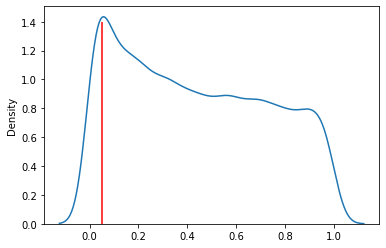

In [34]:
sns.kdeplot( rna_test_p_value);
plt.vlines(x=0.05, ymin=0, ymax=1.4,colors='r');

In [35]:
def find_top(pvalues, number, genes_id):

    top_index = np.argpartition(pvalues, number)[:number]
    top_pvalue = pvalues[top_index]
    top_genes = genes_id[top_index]
    return top_pvalue, top_genes

In [36]:
rna_ttest_top_pvalue , rna_ttest_top_genes = find_top(rna_test_p_value, 10, genes_id)

In [37]:
rna_ttest_top_pvalue
rna_ttest_top_genes

array([7.34798384e-06, 4.62609139e-05, 1.78665476e-05, 4.17660003e-05,
       4.63977620e-05, 4.33405572e-05, 3.81445865e-05, 5.97134166e-05,
       8.26987465e-05, 9.40340810e-05])

Index(['CYTH3', 'ATP1A2', 'RGS14', 'TSPAN9', 'LOC728606', 'CHUK', 'FBXO4',
       'BTRC', 'C12orf5', 'LOC257358'],
      dtype='object')

In [38]:
for p, g in zip(rna_ttest_top_pvalue , rna_ttest_top_genes): 
    print(f'{p:e} & {g} \\\ \n\hline')
    

7.347984e-06 & CYTH3 \\ 
\hline
4.626091e-05 & ATP1A2 \\ 
\hline
1.786655e-05 & RGS14 \\ 
\hline
4.176600e-05 & TSPAN9 \\ 
\hline
4.639776e-05 & LOC728606 \\ 
\hline
4.334056e-05 & CHUK \\ 
\hline
3.814459e-05 & FBXO4 \\ 
\hline
5.971342e-05 & BTRC \\ 
\hline
8.269875e-05 & C12orf5 \\ 
\hline
9.403408e-05 & LOC257358 \\ 
\hline


In [39]:
selected_genes = rna_test_p_value[rna_test_p_value< 0.05]
selected_genes.shape

(2000,)

In [40]:
def plot_hist(data, name):
    fig, ax1 = plt.subplots();

    sns.histplot(data, kde=True, ax=ax1, color='Red', line_kws={'color':'k'});

    ax1.set_xlabel('Pvalue', fontsize=16);
    ax1.set_ylabel('Number of Genes', fontsize=16);

    ax1.tick_params(axis='y', labelsize=15);
    ax1.tick_params(axis='x', labelsize=15);

    plt.xticks(rotation=30);
    fig.set_size_inches(12, 8);
    plt.savefig(f"{name}.png",  # 文件名
                format='png',  # 图片格式
                bbox_inches='tight',  # 图片排版
                dpi=300  # 图片清晰度
                );



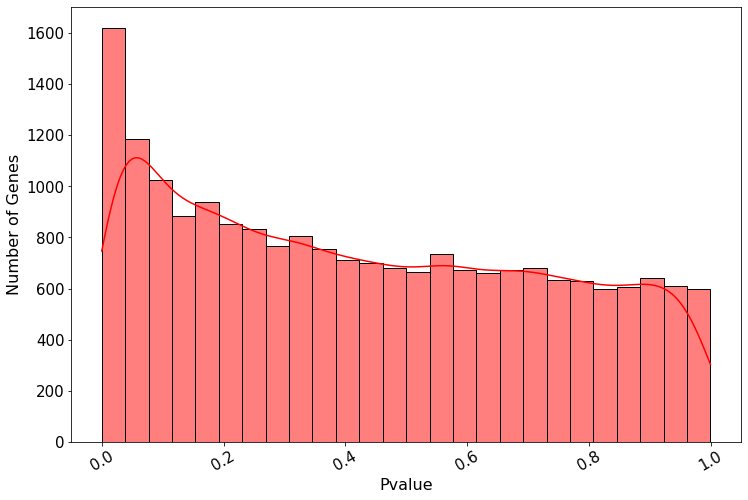

In [41]:
plot_hist(rna_test_p_value, "rna_ttest")

## RNASeq RankSum

In [42]:
# rank-sum
from scipy.stats import ranksums

In [130]:
rna_ranksum_p_value = []
rna_ranksum_statistic = []
for gene in genes_id:
    s, p = ranksums(group1[gene], group2[gene])
    rna_ranksum_statistic.append(s)
    rna_ranksum_p_value.append(p)


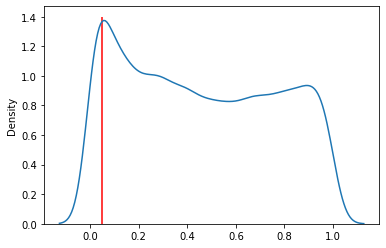

In [131]:
sns.kdeplot(rna_ranksum_p_value);
plt.vlines(x=0.05, ymin=0, ymax=1.4,colors='r');

In [132]:
rna_ranksum_top_pvalue, rna_ranksum_top_genes = find_top(np.array(rna_ranksum_p_value), 10, genes_id)

In [134]:
rna_ranksum_top_pvalue
rna_ranksum_top_genes

array([6.03921783e-05, 5.65629443e-05, 7.21501253e-05, 7.37451688e-06,
       1.21693759e-05, 4.24730558e-05, 5.04646346e-05, 7.53300671e-05,
       9.53251393e-05, 1.12909792e-04])

Index(['TEX261', 'LOC728606', 'SMTNL2', 'ATP1A2', 'CYTH3', 'RGS14', 'BTRC',
       'ASAP3', 'CAMK2G', 'EIF4E3'],
      dtype='object')

In [379]:
for i,g in zip(rna_ranksum_top_pvalue, rna_ranksum_top_genes):
    print(f'{i:e} & {g} \\\ \n\hline')

6.039218e-05 & TEX261 \\ 
\hline
5.656294e-05 & LOC728606 \\ 
\hline
7.215013e-05 & SMTNL2 \\ 
\hline
7.374517e-06 & ATP1A2 \\ 
\hline
1.216938e-05 & CYTH3 \\ 
\hline
4.247306e-05 & RGS14 \\ 
\hline
5.046463e-05 & BTRC \\ 
\hline
7.533007e-05 & ASAP3 \\ 
\hline
9.532514e-05 & CAMK2G \\ 
\hline
1.129098e-04 & EIF4E3 \\ 
\hline


In [201]:
(np.array(rna_ranksum_p_value) < 0.05).sum()  # slected genes number

1985

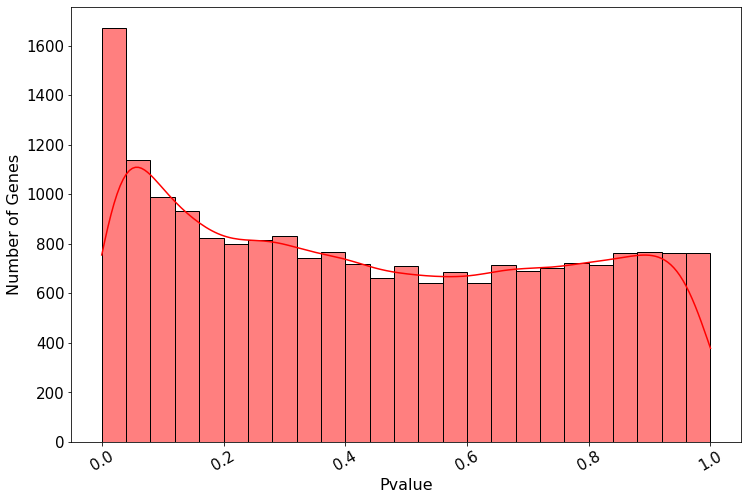

In [67]:
plot_hist(rna_ranksum_p_value, "rna_ranksum")

## Micro data ttest

In [144]:
micro_gene_id = micro_data_groups_exp.columns[1:]

In [145]:
micro_group1 = micro_data_groups_exp[micro_data_groups_exp.Group == 1].iloc[:,1:]
micro_group2 = micro_data_groups_exp[micro_data_groups_exp.Group == 2].iloc[:,1:]


In [146]:
micro_ttest_statistics, micro_ttest_pvalue = ttest_ind(micro_group1, micro_group2, equal_var=False)

In [147]:
micro_ttest_pvalue.shape
micro_group1.shape

(12042,)

(177, 12042)

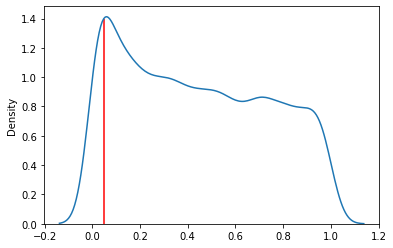

In [148]:
sns.kdeplot(micro_ttest_pvalue);
plt.vlines(x=0.05, ymin=0, ymax=1.4,colors='r');

In [149]:
micro_ttest_top_pvalue, micro_ttest_top_genes = find_top(micro_ttest_pvalue, 10, micro_gene_id)

In [150]:
micro_ttest_top_pvalue
micro_ttest_top_genes

array([8.05143677e-06, 6.59887745e-05, 2.98820460e-05, 3.27424082e-05,
       9.72588987e-06, 6.27539193e-05, 9.13466625e-06, 2.82065956e-05,
       2.63691619e-06, 4.85239531e-05])

Index(['AXL', 'LRIG1', 'PART1', 'RABAC1', 'GALNT10', 'TEC', 'NOTCH4',
       'SLC37A4', 'NDRG3', 'OLFML3'],
      dtype='object')

In [151]:
for i,g in zip(micro_ttest_top_pvalue, micro_ttest_top_genes):
    print(f'{i:e} & {g} \\\ \n\hline')

8.051437e-06 & AXL \\ 
\hline
6.598877e-05 & LRIG1 \\ 
\hline
2.988205e-05 & PART1 \\ 
\hline
3.274241e-05 & RABAC1 \\ 
\hline
9.725890e-06 & GALNT10 \\ 
\hline
6.275392e-05 & TEC \\ 
\hline
9.134666e-06 & NOTCH4 \\ 
\hline
2.820660e-05 & SLC37A4 \\ 
\hline
2.636916e-06 & NDRG3 \\ 
\hline
4.852395e-05 & OLFML3 \\ 
\hline


In [202]:
(micro_ttest_pvalue < 0.05).sum()

1268

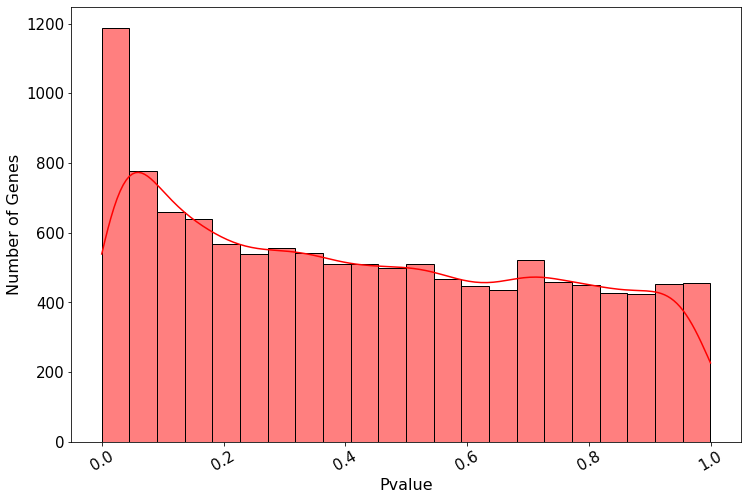

In [153]:
plot_hist(micro_ttest_pvalue, 'micro_ttest')

## Micro data ranksum

In [154]:
micro_ranksum_p_value = []
micro_ranksum_statistic = []
for gene in micro_gene_id:
    s, p = ranksums(micro_group1[gene], micro_group2[gene])
    micro_ranksum_statistic.append(s)
    micro_ranksum_p_value.append(p)


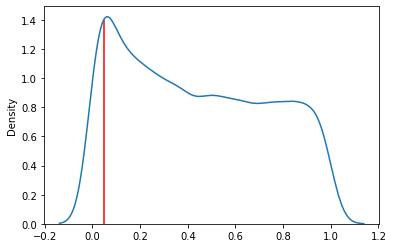

In [155]:
sns.kdeplot(micro_ranksum_p_value);
plt.vlines(x=0.05, ymin=0, ymax=1.4,colors='r');

In [156]:
micro_ranksum_top_pvalue, micro_ranksum_top_genes = find_top(np.array(micro_ranksum_p_value), 10, micro_gene_id)

In [157]:
micro_ranksum_top_pvalue
micro_ranksum_top_genes

array([2.50369178e-07, 3.25272308e-05, 5.28179002e-05, 1.53425892e-05,
       2.03330485e-05, 5.29878713e-05, 7.59166638e-05, 5.63174932e-05,
       8.55417001e-05, 1.04082662e-04])

Index(['NDRG3', 'RABAC1', 'C20orf3', 'GALNT10', 'AXL', 'ANXA4', 'SLC37A4',
       'CTSA', 'LRIG1', 'AKAP12'],
      dtype='object')

In [159]:
for i,g in zip(micro_ranksum_top_pvalue,micro_ranksum_top_genes):
    print(f'{i:e} & {g} \\\ \n\hline')

2.503692e-07 & NDRG3 \\ 
\hline
3.252723e-05 & RABAC1 \\ 
\hline
5.281790e-05 & C20orf3 \\ 
\hline
1.534259e-05 & GALNT10 \\ 
\hline
2.033305e-05 & AXL \\ 
\hline
5.298787e-05 & ANXA4 \\ 
\hline
7.591666e-05 & SLC37A4 \\ 
\hline
5.631749e-05 & CTSA \\ 
\hline
8.554170e-05 & LRIG1 \\ 
\hline
1.040827e-04 & AKAP12 \\ 
\hline


In [203]:
(np.array(micro_ranksum_p_value) < 0.05).sum()

1257

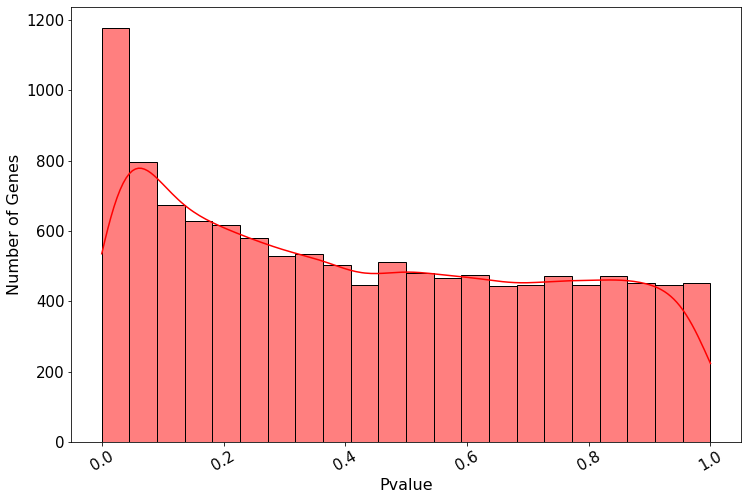

In [163]:
plot_hist(micro_ranksum_p_value, "micro_ranksum")

## Multi Test

### Bon Test

In [164]:
sig = 0.05

def bonferroni_correction(pvalues, sig, genes_id):
    adjusted_sig = sig/pvalues.shape[0]
    selected_pvalue = pvalues[pvalues < adjusted_sig]
    selected_genes = genes_id[pvalues < adjusted_sig  ]
    return selected_pvalue, selected_genes

In [165]:
bonferroni_correction( rna_test_p_value, sig, genes_id)

(array([], dtype=float64), Index([], dtype='object'))

In [166]:
# bonferroni_correction(np.array(rna_ranksum_p_value), sig, genes_id)

In [167]:
bonferroni_correction(micro_ttest_pvalue, sig, micro_gene_id)

(array([2.63691619e-06]), Index(['NDRG3'], dtype='object'))

In [168]:
# bonferroni_correction(np.array(micro_ranksum_p_value), sig, micro_gene_id)

### FDR

In [171]:
def fdr(pvalues, sig, genes):
    """test result"""

    sort_index = np.argsort(pvalues)
    sort_genes = genes[sort_index]
    sort_pvalues = pvalues[sort_index]

    rank_index  = np.arange(0, sort_pvalues.shape[0]) + 1

    adj_p = (rank_index / sort_pvalues.shape[0]) * sig


    conditon = sort_pvalues <= adj_p

    if conditon.any():
        max_i = np.argmax(np.cumsum(conditon))

        selected_genes = sort_genes[:max_i+1]
        selected_pvalues = sort_pvalues[:max_i+1]
        return selected_pvalues, selected_genes






def fdr_correction(pvalues):

    if all(sorted(pvalues) == pvalues):
        return pvalues
    else:
        temp = []
        for ind, item in enumerate(pvalues[:-1]):
            v = min(item , pvalues[ind +1])
            temp.append(v)
        temp.append(pvalues[-1])
        return fdr_correction(np.array(temp))

def get_fdr_threshold(pvalues, numbers, genes):

    sort_index = np.argsort(pvalues)
    sort_genes = genes[sort_index]
    sort_pvalues = pvalues[sort_index]


    rank_index  = np.arange(0, sort_pvalues.shape[0]) + 1

    temp_p =  (sort_pvalues.shape[0] * sort_pvalues) / rank_index

    fdr = fdr_correction(temp_p)

    return fdr[np.array(numbers) -1].tolist() , sort_genes





In [177]:
from statsmodels.stats.multitest import multipletests

pvalues = rna_test_p_value
sort_index = np.argsort(pvalues)
sort_genes = genes_id[sort_index]
sort_pvalues = pvalues[sort_index]


In [178]:
# using statistic model to get fdr value for rna

_,mp, *_ = multipletests(sort_pvalues, method='fdr_bh', is_sorted=True)

In [180]:
mp[[20-1, 50-1, 100-1, 200-1]].tolist()

[0.1723868295115724,
 0.2123598414113462,
 0.25079808129875447,
 0.3197486029507247]

In [175]:
get_fdr_threshold(rna_test_p_value, [20-1, 50-1, 100-1, 200-1], genes_id)

([0.1723868295115724,
  0.2123598414113462,
  0.25079808129875447,
  0.31974860295072466],
 Index(['CYTH3', 'RGS14', 'FBXO4', 'TSPAN9', 'CHUK', 'ATP1A2', 'LOC728606',
        'BTRC', 'C12orf5', 'LOC257358',
        ...
        'OR5AR1', 'FAM119A', 'LOC100128292', 'LY6E', 'TNIK', 'GJB5', 'SRGAP3',
        'MAPK11', 'TBRG1', 'C12orf35'],
       dtype='object', length=20162))

In [183]:
fdr(rna_test_p_value,0.1723868295115724, genes_id )[0].shape
fdr(rna_test_p_value,0.2123598414113462, genes_id )[0].shape
fdr(rna_test_p_value,0.25079808129875447, genes_id )[0].shape
fdr(rna_test_p_value,0.3197486029507247, genes_id )[0].shape

(29,)

(50,)

(84,)

(216,)

In [184]:
get_fdr_threshold(micro_ttest_pvalue, [20-1, 50-1, 100-1, 200-1], micro_gene_id)

([0.1324712603446682,
  0.17366641103505984,
  0.19131731961025905,
  0.2781789817248434],
 Index(['NDRG3', 'AXL', 'NOTCH4', 'GALNT10', 'SLC37A4', 'PART1', 'RABAC1',
        'OLFML3', 'TEC', 'LRIG1',
        ...
        'CBARA1', 'ARPC3', 'ANKRD5', 'TCAP', 'SOX9', 'RBM5', 'ELAC2', 'HMG20B',
        'SMAD2', 'DLX2'],
       dtype='object', length=12042))

In [186]:
pvalues = micro_ttest_pvalue
sort_index = np.argsort(pvalues)
sort_genes = micro_gene_id[sort_index]
sort_pvalues = pvalues[sort_index]

In [187]:
_,mp2, *_ = multipletests(sort_pvalues, method='fdr_bh', is_sorted=True)

In [188]:
mp2[[20-1, 50-1, 100-1, 200-1]].tolist()

[0.13247126034466816,
 0.17366641103505984,
 0.20043651362141873,
 0.2781789817248434]

In [189]:
for i in mp2[[20-1, 50-1, 100-1, 200-1]].tolist():
    fdr(micro_ttest_pvalue,i ,micro_gene_id)[0].shape




(18,)

(50,)

(100,)

(205,)

## Final question

### t-test

In [190]:
def sort_pvalue(pvalues, genes):
    sort_index = np.argsort(pvalues)
    sort_genes = genes[sort_index]
    sort_pvalues = pvalues[sort_index]
    return sort_pvalues, sort_genes


In [196]:
def get_overlap(pvalues1, genes1 , pvalues2, genes2, x ):
    for number in x:
        selected_genes1 = sort_pvalue(pvalues1, genes1)[1][:number]
        selected_genes2 = sort_pvalue(pvalues2, genes2)[1][:number]
        yield (selected_genes1 & selected_genes2 ).shape[0]

In [197]:
x1 = range(10, 1010, 10)
y1 = list(get_overlap(rna_test_p_value, genes_id, micro_ttest_pvalue, micro_gene_id, x1) )

## ranksum

In [198]:
x2 = range(10, 1010, 10)
y2 = list(get_overlap(np.array(rna_ranksum_p_value), genes_id, np.array(micro_ranksum_p_value), micro_gene_id, x2) )

## Plot

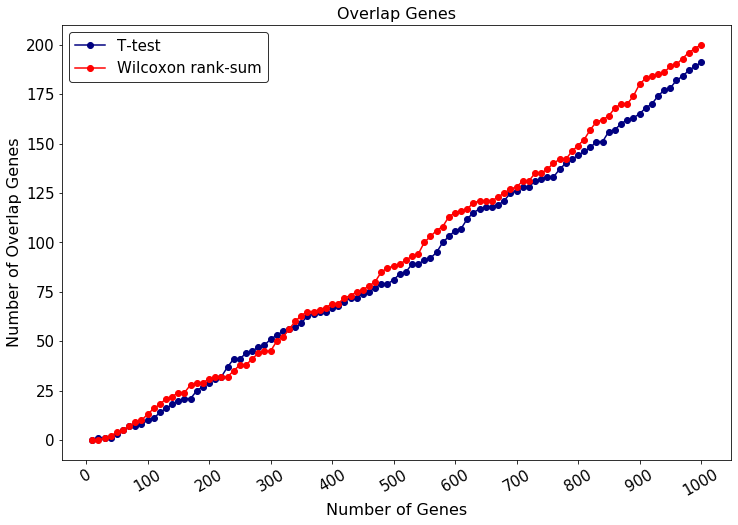

In [199]:
fig, ax1 = plt.subplots();


plt.plot(x1,y1, marker = 'o', color='navy' , label = "T-test")
plt.plot(x2,y2, marker = 'o', color='red', label = "Wilcoxon rank-sum")

ax1.set_xlabel('Number of Genes', fontsize=16);
ax1.set_ylabel('Number of Overlap Genes', fontsize=16);

ax1.tick_params(axis='y', labelsize=15);
ax1.tick_params(axis='x', labelsize=15);
ax1.set_xticks(range(0,1100,100))
ax1.legend(fontsize=15,edgecolor='k',fancybox=True)
ax1.set_title("Overlap Genes", fontsize=16)
plt.xticks(rotation=30);
fig.set_size_inches(12, 8);
plt.savefig(f"overlap_genes.png",  # 文件名
            format='png',  # 图片格式
            bbox_inches='tight',  # 图片排版
            dpi=300  # 图片清晰度
            );

In [404]:

def ttest(datafile):
    df = pd.read_csv(datafile, sep="\t", index_col=0)
    genes_expression = (df == 0).all(axis=0)[~(df == 0).all(axis=0)].index
    df = df[genes_expression]
    genes_id = df.columns[1:]
    group1 = df[df.Group == 1].iloc[:, 1:]
    group2 = df[df.Group == 2].iloc[:, 1:]
    t_statistics, p_values = ttest_ind(group1, group2)
    return t_statistics, p_values, genes_id



def fdr_correction(pvalues):

    if all(sorted(pvalues) == pvalues):
        return pvalues
    else:
        temp = []
        for ind, item in enumerate(pvalues[:-1]):
            v = min(item , pvalues[ind +1])
            temp.append(v)
        temp.append(pvalues[-1])
        return fdr_correction(np.array(temp))

def get_fdr_threshold(pvalues, numbers, genes):

    sort_index = np.argsort(pvalues)
    sort_genes = genes[sort_index]
    sort_pvalues = pvalues[sort_index]


    rank_index  = np.arange(0, sort_pvalues.shape[0]) + 1

    temp_p =  (sort_pvalues.shape[0] * sort_pvalues) / rank_index

    fdr = fdr_correction(temp_p)

    return fdr[np.array(numbers) -1].tolist() , sort_genes






In [405]:
seqdata = 'SeqData.txt'
arraydata = 'ArrayData.txt'

In [406]:

    seq_statistics, seq_pvalues, seq_genes = ttest(seqdata)
    array_statistics, array_pvalues, array_genes = ttest(arraydata)

In [412]:
seq_pvalues[~(seq_pvalues == rna_test_p_value)]

array([0.67514184, 0.70118889, 0.27829037, ..., 0.59960707, 0.42325652,
       0.01485486])

In [413]:
rna_test_p_value[~(seq_pvalues == rna_test_p_value)]

array([0.67514184, 0.70118889, 0.27829037, ..., 0.59960707, 0.42325652,
       0.01485486])